In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.set_option('display.max_columns',None)

In [173]:
# Creating a dataframe from the csv file
data=pd.read_csv('train.csv')

In [174]:
# Size of the data
data.shape

(1460, 81)

In [175]:
# The basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [176]:
# Finding the distribution of the values in all numerical columns
data.describe(percentiles=[0.05,0.25,0.5,0.75,0.9,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
99%,1445.410000,190.000000,141.000000,37

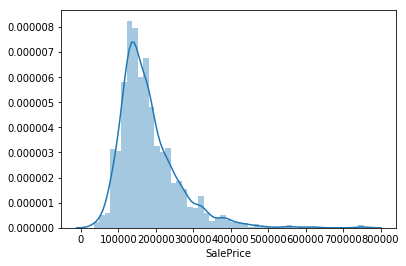

In [177]:
# Finding the distribution of the dependent variable, SalePrice
sns.distplot(data['SalePrice'])
plt.show()

SalePrice is right skew distributed

In [178]:
# Transforming the SalePrice column to make it normally distributed by using log
data['SalePrice']=data['SalePrice'].apply(lambda x:math.log(x))

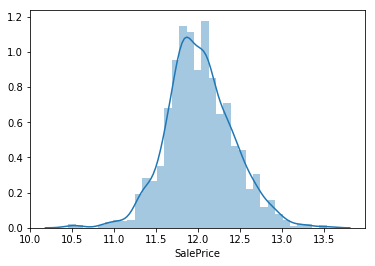

In [179]:
# Finding the distribution of the dependent variable, SalePrice, after transformation
sns.distplot(data['SalePrice'])
plt.show()

In [180]:
# List of only numerical columns
num_col=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
        '2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
        'ScreenPorch','PoolArea','MiscVal']


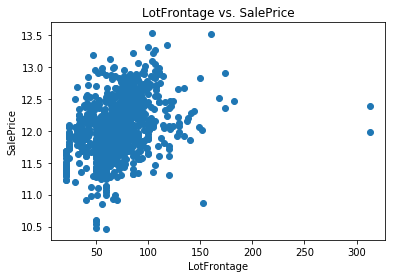

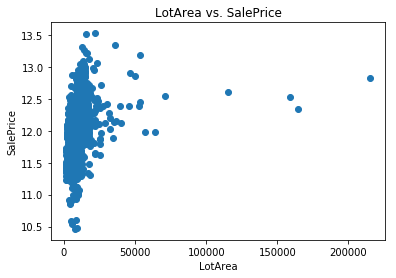

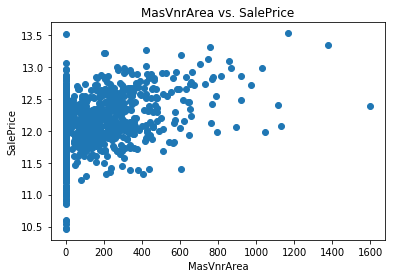

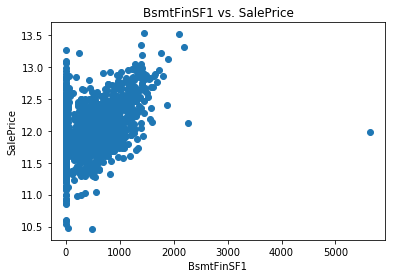

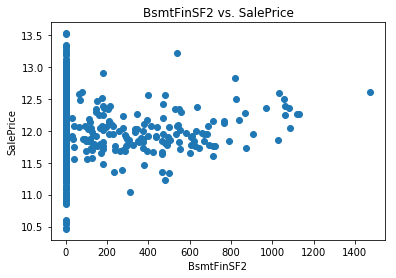

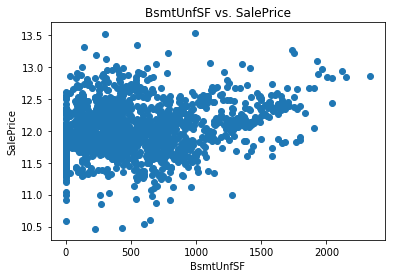

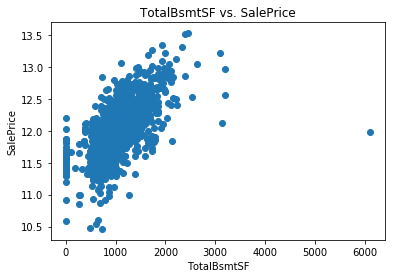

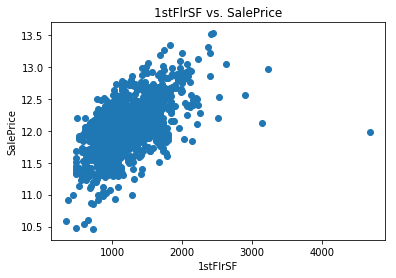

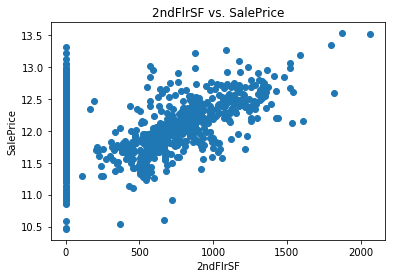

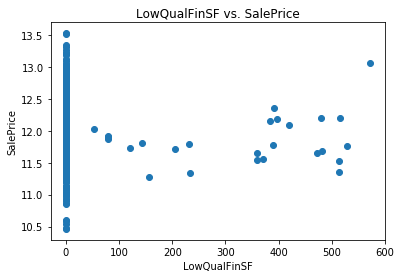

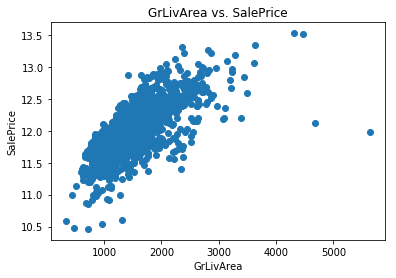

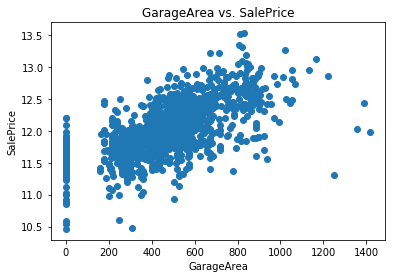

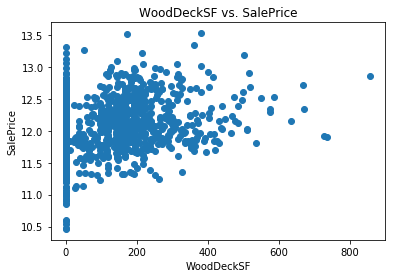

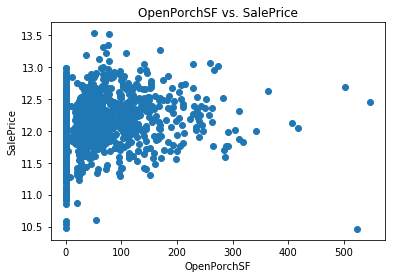

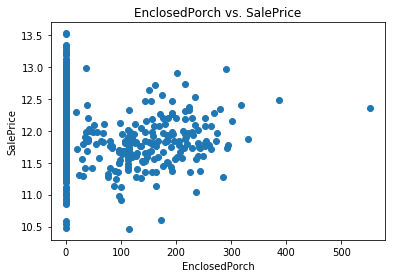

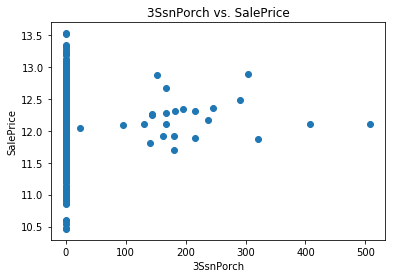

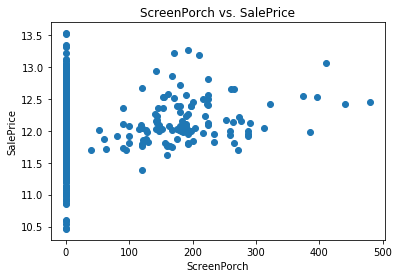

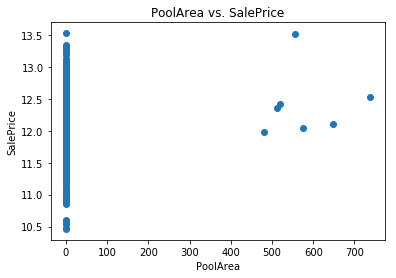

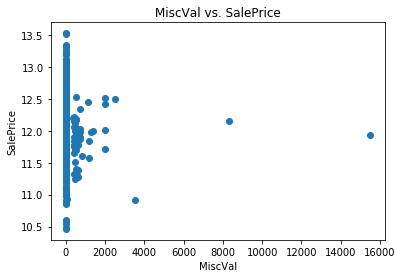

In [181]:
# Checking the relationship between each numercial colum and SalePrice
for col in num_col:
    plt.scatter(x=col,y='SalePrice',data=data)
    plt.title(col+' vs. SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

There seems to be a linear relationship between 
a. Sales and GrLiveArea
b. Sales and 1stFlrSF
c. Sales and LotArea
d. Sales and LotFrontage

In [182]:
# Finding the percent of null values for each column
Null_Percent=pd.DataFrame({'%':round(100*data.isnull().mean(),2)})
Null_Percent.sort_values(by='%',ascending=False,inplace=True)

# Dropping all columns which have no null values
Null_Percent=Null_Percent.loc[(Null_Percent['%']>0.00)]
Null_Percent

,%
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [183]:
# Dropping columns with high percentage of null values from dataframe = 'data'
data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

# Dropping columns with high percentage of null values from dataframe ='Null_Percent'
Null_Percent.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=0,inplace=True)

# Imputing median (for numerical values) or mode (for categorical values) for those columns with low percent of null values
for row in Null_Percent.index:
    if row not in num_col:
        temp=data[row].mode()
        data[row].fillna(value=temp[0],inplace=True)
    else:
        data[row].fillna(value=data[row].median(),inplace=True)

# Finding the percent of null values for each column
Null_Percent_modified=pd.DataFrame({'%':round(100*data.isnull().mean(),2)})
Null_Percent_modified.sort_values(by='%',ascending=False,inplace=True)

# Dropping all columns which have no null values
Null_Percent_modified=Null_Percent_modified.loc[(Null_Percent_modified['%']>0.00)]
Null_Percent_modified


,%


Zero columns have null values

In [184]:
# Size of the data after removing/imputing null values
data.shape

(1460, 76)

In [185]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


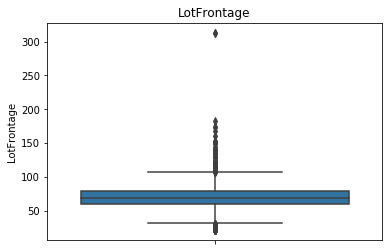

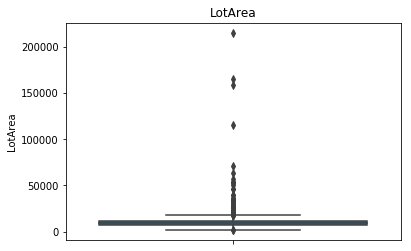

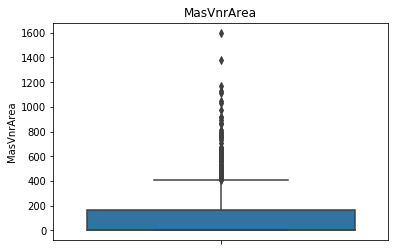

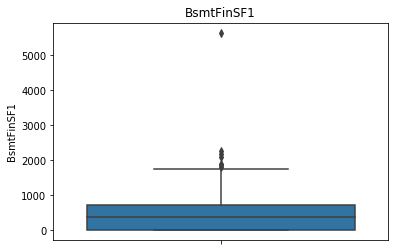

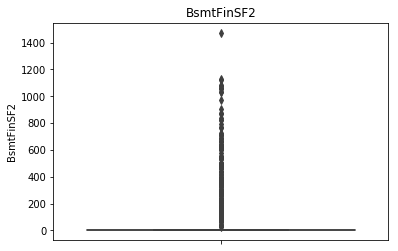

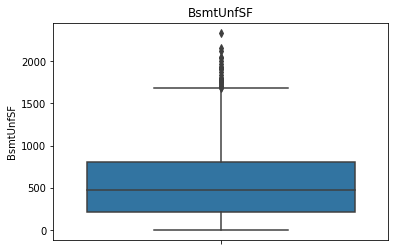

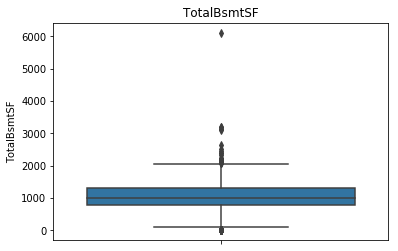

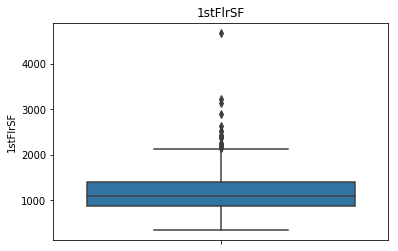

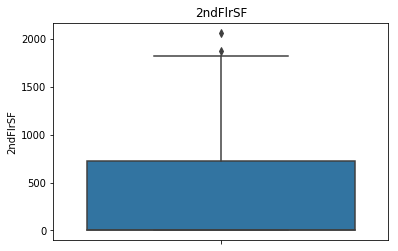

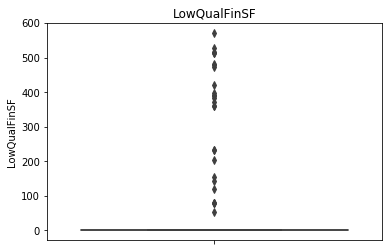

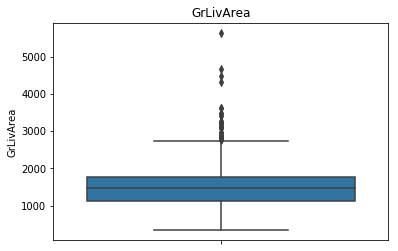

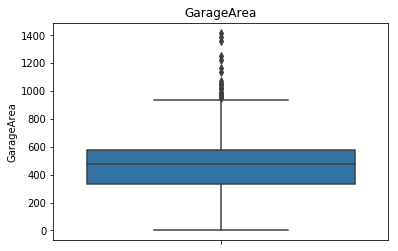

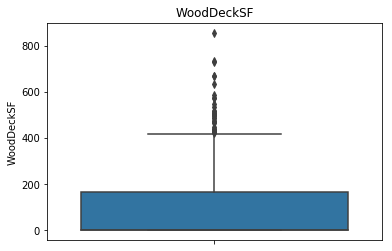

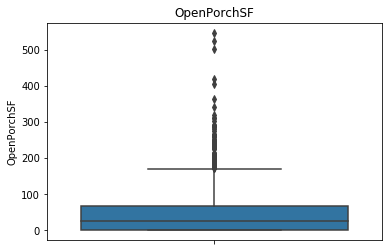

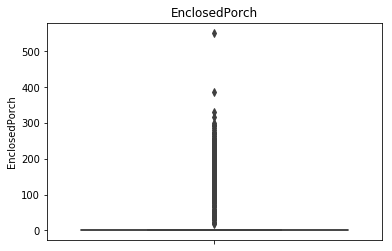

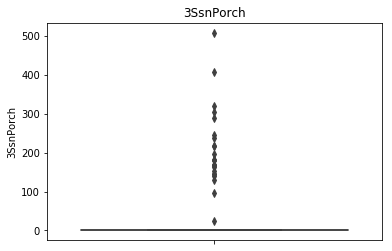

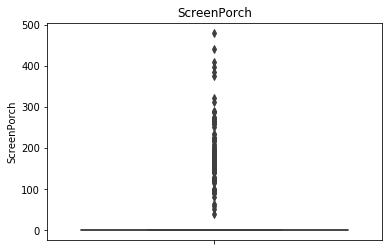

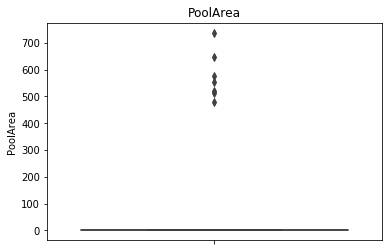

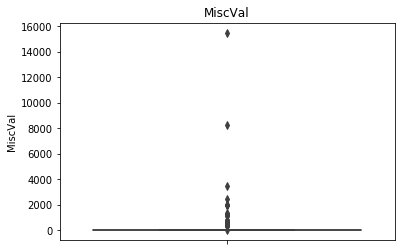

In [186]:
# Checking for outliers
for col in num_col:
    sns.boxplot(y=col,data=data)
    plt.title(col)
    plt.show()

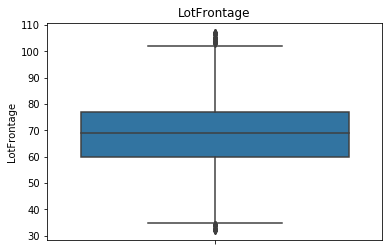

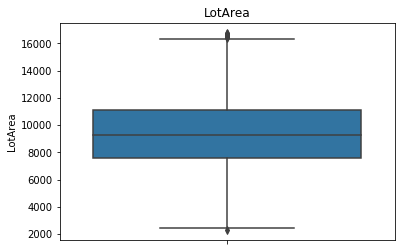

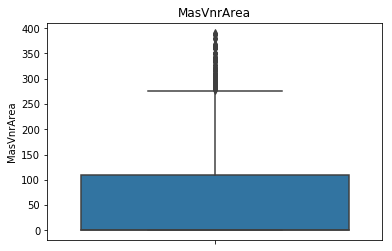

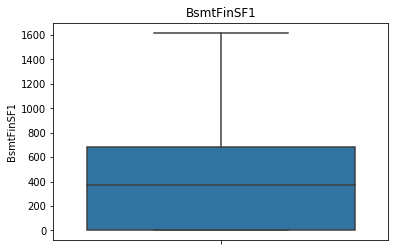

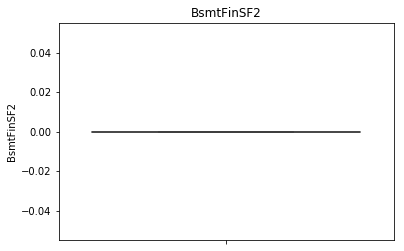

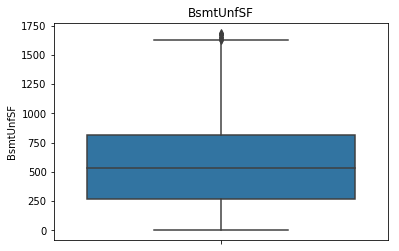

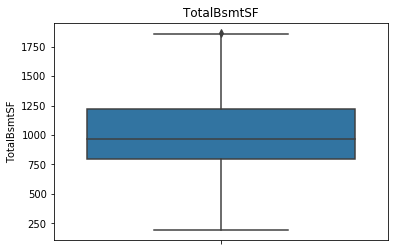

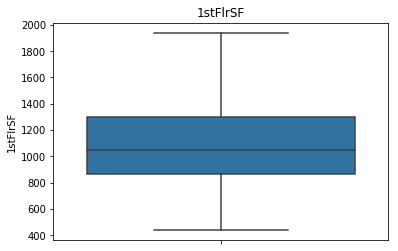

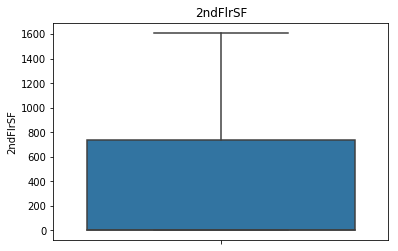

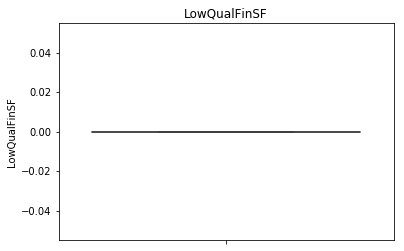

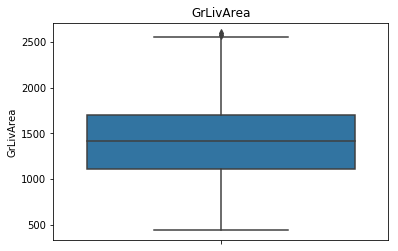

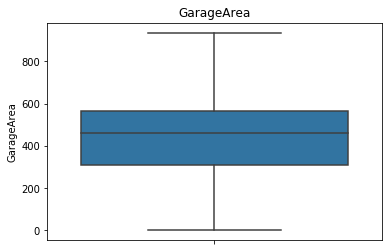

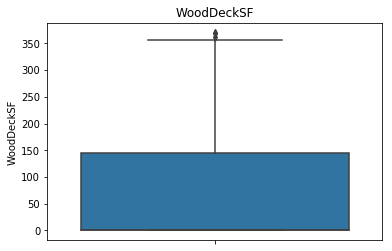

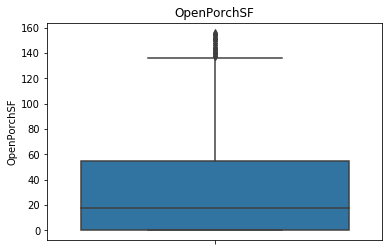

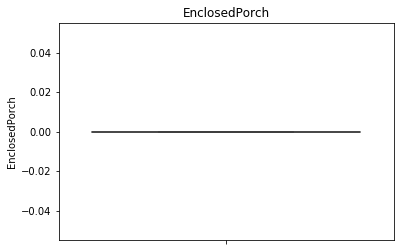

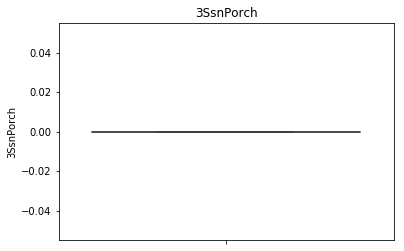

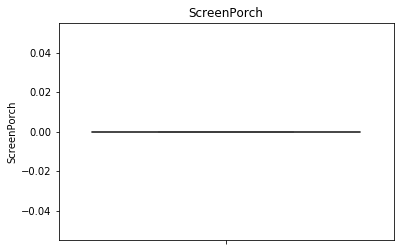

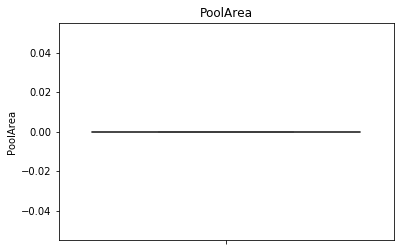

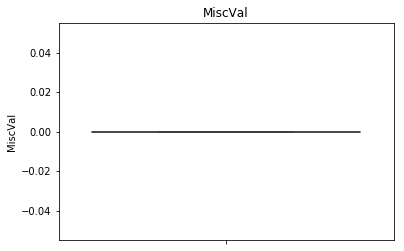

In [187]:
# All numerical columns have outliers so will treat the outliers
for col in num_col:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    minimum=q1-1.5*iqr
    maximum=q3+1.5*iqr
    data=data.loc[(data[col]>=minimum)&(data[col]<=maximum)]
    sns.boxplot(y=data[col])
    plt.title(col)
    plt.show()

In [188]:
# Finding the columns with only one unique value
drop_col=[]
print('Columns with one unique value:')
for col in data.columns:
    if data[col].nunique(dropna=False)==1:
        drop_col.append(col)
        print(col)
        
# Removing column from num_col if column is numerical
for col in drop_col:
    if col in num_col:
        num_col.remove(col)

Columns with one unique value:
Utilities
BsmtFinType2
BsmtFinSF2
LowQualFinSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal


In [189]:
# Final list of numerical columns
num_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [190]:
# Removing the columns with only one unique value
for col in drop_col:
    data.drop(col,axis=1,inplace=True)

# Shape of dataframe after removing columns
data.shape

(659, 67)

In [191]:
# Finding the columns which have just two unique values
binary_col=[]
for col in data.columns:
    if data[col].nunique(dropna=False)==2:
        binary_col.append(col)
        print(col)

Street
RoofMatl
CentralAir


In [192]:
# Converting the values to 0 and 1
data['Street']=data['Street'].map(lambda x:1 if x == 'Pave' else 0)
data['RoofMatl']=data['RoofMatl'].map(lambda x:1 if x=='CompShg' else 0)
data['CentralAir']=data['CentralAir'].map(lambda x:1 if x=='Y' else 0)

In [193]:
# Creating derived metrics
data['OriginalAgeAtSell']=data['YrSold']-data['YearBuilt']
data['RemodelAgeAtSell']=data['YrSold']-data['YearRemodAdd']

In [194]:
# Creating dummy variables
for col in data.columns:
    if col not in num_col:
        if col not in ['SalePrice','Id']:
            if col not in binary_col:
                temp=pd.get_dummies(data[col],prefix=col)
                data=pd.concat([data,temp],axis=1)
                data.drop(col,axis=1,inplace=True)
data.shape

(659, 691)

In [195]:
data.head()

,Id,LotFrontage,LotArea,Street,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1880,YearBuilt_1898,YearBuilt_1900,YearBuilt_1908,YearBuilt_1910,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1920,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1987,YearBuilt_1988,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemodAdd_1991,YearRemodAdd_1992,YearRemodAdd_1993,YearRemodAdd_1994,YearRemodAdd_1995,YearRemodAdd_1996,YearRemodAdd_19

In [196]:
# Creating test and train dataframe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

In [197]:
# Splitting the dataframe into train and test dataframes
dftrain,dftest=train_test_split(data,train_size=0.7,random_state=100)
print(dftrain.shape)
print(dftest.shape)

(461, 691)
(198, 691)


C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [198]:
# Scaling the numerical features of dftrain
scale=MinMaxScaler()
dftrain[num_col]=scale.fit_transform(dftrain[num_col])

# Splitting the train dataframe into x and y dataframes
xtrain=dftrain.drop(['Id','SalePrice'],axis=1)
ytrain=dftrain['SalePrice']

dftest[num_col]=scale.transform(dftest[num_col])
xtest=dftest.drop(['Id','SalePrice'],axis=1)
ytest=dftest['SalePrice']

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anupama\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item]

In [199]:
xtrain.head()

,LotFrontage,LotArea,Street,RoofMatl,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1880,YearBuilt_1898,YearBuilt_1900,YearBuilt_1908,YearBuilt_1910,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1920,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1987,YearBuilt_1988,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemodAdd_1991,YearRemodAdd_1992,YearRemodAdd_1993,YearRemodAdd_1994,YearRemodAdd_1995,YearRemodAdd_1996,YearRemodAdd_1997,YearRemodA

In [200]:
xtrain.shape

(461, 689)

In [201]:
ytrain.head()

1304    11.775290
965     12.094582
730     12.373703
239     11.635143
600     12.524526
Name: SalePrice, dtype: float64

In [202]:
# Using Grid Search Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [203]:
# Ridge Regression
rparams = {'alpha': [0.1,0.5,1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,11,12,13,14,15,16,17,18,19, 20, 40]}

ridge=Ridge()

# Using Grid Search Cross Validation
Folds=5
model_cv=GridSearchCV(estimator=ridge,param_grid=rparams,scoring='r2',cv=Folds,return_train_score=True,
                     verbose=1)
model_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    6.1s finished
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [204]:
# Creating dataframe with the cross validation results
cvresults=pd.DataFrame(model_cv.cv_results_)
cvresults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076728,0.014233,0.007989,0.002531,0.1,{'alpha': 0.1},0.731888,0.384535,0.683976,0.668923,0.639943,0.622092,0.122310,23,0.995957,0.997219,0.996417,0.996527,0.996328,0.996490,0.000412
1,0.075536,0.007640,0.010205,0.004192,0.5,{'alpha': 0.5},0.821813,0.528867,0.734826,0.764457,0.690157,0.708271,0.099298,22,0.989168,0.992786,0.991103,0.990982,0.991708,0.991149,0.001179
2,0.061946,0.014724,0.007213,0.003000,1,{'alpha': 1.0},0.845534,0.584386,0.759931,0.793015,0.704570,0.737722,0.089246,21,0.983474,0.988735,0.986246,0.985849,0.987472,0.986355,0.001759
3,0.052413,0.003235,0.006431,0.002345,2,{'alpha': 2.0},0.866736,0.634422,0.782691,0.818661,0.714928,0.763712,0.081404,20,0.974556,0.982353,0.978638,0.977614,0.980874,0.978807,0.002697
4,0.082784,0.039681,0.018449,0.021006,3,{'alpha': 3.0},0.877510,0.659978,0.793313,0.832641,0.720024,0.776912,0.078036,19,0.967397,0.977162,0.972551,0.970894,0.975575,0.972716,0.003452


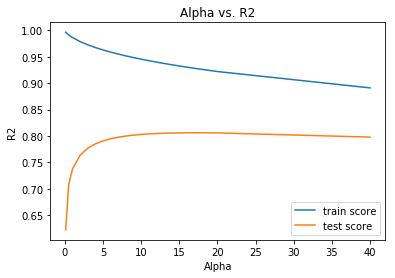

In [205]:
# plotting mean test and train score against each alpha value
cvresults['param_alpha'] = cvresults['param_alpha'].astype('float32')
plt.plot(cvresults.param_alpha,cvresults.mean_train_score)
plt.plot(cvresults.param_alpha,cvresults.mean_test_score)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title("Alpha vs. R2")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [206]:
# Using Ridge Regression with alpha = 10
al=10
ridge=Ridge(alpha=al)
ridge.fit(xtrain,ytrain)

# predict
y_train_pred = ridge.predict(xtrain)
print("Train R2 =",metrics.r2_score(y_true=ytrain, y_pred=y_train_pred))
y_test_pred = ridge.predict(xtest)
print("Test R2 =",metrics.r2_score(y_true=ytest, y_pred=y_test_pred))

Train R2 = 0.9405208133930203
Test R2 = 0.8915728779011307


In [207]:
# Using lasso regression
lasso=Lasso()
Folds=5
lparams = {'alpha': [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.1]}
modelcv=GridSearchCV(estimator=lasso,param_grid=lparams,cv=Folds,return_train_score=True,scoring='r2',verbose=1)
modelcv.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [208]:
# Creating dataframe with the cross validation results
cvresults=pd.DataFrame(modelcv.cv_results_)
cvresults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.044755,0.008360,0.001591,0.001948,0.001,{'alpha': 0.001},0.889719,0.736325,0.806681,0.844792,0.757837,0.807250,0.056076,2,0.929702,0.945271,0.939353,0.932026,0.943652,0.938001,0.006184
1,0.026364,0.004074,0.003303,0.001663,0.002,{'alpha': 0.002},0.879437,0.740715,0.803786,0.868912,0.748409,0.808406,0.058185,1,0.898386,0.917451,0.911084,0.897529,0.911461,0.907182,0.007868
2,0.027860,0.008419,0.002396,0.001957,0.003,{'alpha': 0.003},0.866025,0.745685,0.793663,0.863099,0.734557,0.800748,0.055901,3,0.876675,0.895620,0.890309,0.873475,0.888507,0.884917,0.008430
3,0.022380,0.003185,0.001806,0.002237,0.004,{'alpha': 0.004},0.847909,0.745128,0.786702,0.857395,0.725335,0.792614,0.053053,4,0.856670,0.874562,0.872529,0.857481,0.869707,0.866190,0.007604
4,0.025813,0.004525,0.003001,0.001545,0.005,{'alpha': 0.005},0.832610,0.749544,0.777849,0.849343,0.713226,0.784619,0.050720,5,0.841854,0.861684,0.855735,0.841511,0.853384,0.850834,0.007947


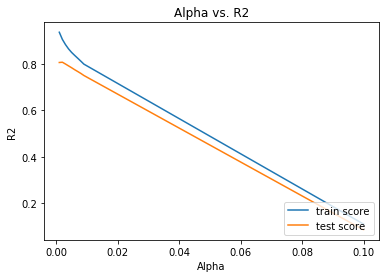

In [209]:
# Plotting alpha and R2
plt.plot(cvresults.param_alpha,cvresults.mean_train_score)
plt.plot(cvresults.param_alpha,cvresults.mean_test_score)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title("Alpha vs. R2")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [210]:
# Looking at the graph above, choosing alpha as 0.001
al=0.001
lasso=Lasso(alpha=al)
lasso.fit(xtrain,ytrain)

# Finding the R2 score for test and train data
ytrain_pred=lasso.predict(xtrain)
print('Train R2 =',metrics.r2_score(y_true=ytrain,y_pred=ytrain_pred))
ytest_pred=lasso.predict(xtest)
print('Test R2 =',metrics.r2_score(y_true=ytest,y_pred=ytest_pred))

Train R2 = 0.9255161598115502
Test R2 = 0.9073995349537838


In [211]:
# Creating a dataframe with all coefficients of lasso regression
Lasso_Coef=pd.DataFrame(lasso.coef_)
Lasso_Coef.rename(columns={0:'Coefficients'},inplace=True)
Lasso_Coef

,Coefficients
0,0.000000
1,0.002341
2,0.000000
3,-0.000000
4,0.000000
5,0.151242
6,-0.000000
7,0.186145
8,0.044776
9,0.000000


In [212]:
# Shape of lasso_coef dataframe
Lasso_Coef.shape

(689, 1)

In [213]:
# Creating a new dataframe with all lasso coefficients and all features
xtrainfeatures=pd.DataFrame(xtrain.columns)
coefficients = pd.concat([xtrainfeatures,Lasso_Coef], axis = 1)
coefficients.rename(columns={0:'Features'},inplace=True)
coefficients.head()

,Features,Coefficients
0,LotFrontage,0.000000
1,LotArea,0.002341
2,Street,0.000000
3,RoofMatl,-0.000000
4,MasVnrArea,0.000000


In [214]:
# Dropping all features which have coefficient = 0
coefficients=coefficients.transpose()
for col in coefficients:
    if coefficients[col][1]==0:
        coefficients.drop(col,axis=1,inplace=True)

# Sorting the features in descending order
coefficients=coefficients.transpose()
coefficients=coefficients.sort_values(by='Coefficients',ascending=False)
coefficients.head(10)

,Features,Coefficients
11,GrLivArea,0.555607
7,TotalBsmtSF,0.186145
5,BsmtFinSF1,0.151242
12,GarageArea,0.100214
103,OverallQual_8,0.0967208
104,OverallQual_9,0.0876029
365,KitchenQual_Ex,0.083236
264,YearRemodAdd_2009,0.0701269
69,Neighborhood_Somerst,0.0640503
309,Foundation_PConc,0.0544435


# Solving subjective question 1

In [215]:
# Ridge regression
al=20
ridge2=Ridge(alpha=al)
ridge2.fit(xtrain,ytrain)

# predict
y_train_pred = ridge2.predict(xtrain)
print("Train R2 =",metrics.r2_score(y_true=ytrain, y_pred=y_train_pred))
y_test_pred = ridge2.predict(xtest)
print("Test R2 =",metrics.r2_score(y_true=ytest, y_pred=y_test_pred))

Train R2 = 0.9191597664489941
Test R2 = 0.8795546727097876


In [216]:
#Lasso Regression
al=0.002
lasso2=Lasso(alpha=al)
lasso2.fit(xtrain,ytrain)

# Finding the R2 score for test and train data
ytrain_pred=lasso2.predict(xtrain)
print('Train R2 =',metrics.r2_score(y_true=ytrain,y_pred=ytrain_pred))
ytest_pred=lasso2.predict(xtest)
print('Test R2 =',metrics.r2_score(y_true=ytest,y_pred=ytest_pred))

Train R2 = 0.8964673944460493
Test R2 = 0.8937754651751714


In [217]:
# Creating a dataframe with all coefficients of lasso regression
Lasso_Coef2=pd.DataFrame(lasso2.coef_)
Lasso_Coef2.rename(columns={0:'Coefficients'},inplace=True)
Lasso_Coef2

,Coefficients
0,0.000000
1,0.000000
2,0.000000
3,-0.000000
4,0.000000
5,0.132035
6,-0.000000
7,0.178058
8,0.081277
9,0.000000


In [218]:
# Creating a new dataframe with all lasso coefficients and all features
xtrainfeatures=pd.DataFrame(xtrain.columns)
coefficients2 = pd.concat([xtrainfeatures,Lasso_Coef2], axis = 1)
coefficients2.rename(columns={0:'Features'},inplace=True)

# Dropping all features which have coefficient = 0
coefficients2=coefficients2.transpose()
for col in coefficients2:
    if coefficients2[col][1]==0:
        coefficients2.drop(col,axis=1,inplace=True)
        
# Sorting the features in descending order
coefficients2=coefficients2.transpose()
coefficients2=coefficients2.sort_values(by='Coefficients',ascending=False)
coefficients2.head(10)

,Features,Coefficients
11,GrLivArea,0.508944
7,TotalBsmtSF,0.178058
12,GarageArea,0.136728
5,BsmtFinSF1,0.132035
365,KitchenQual_Ex,0.0968413
8,CentralAir,0.0812766
103,OverallQual_8,0.0774961
309,Foundation_PConc,0.0607536
325,BsmtFinType1_GLQ,0.0475166
75,Condition1_Norm,0.0417948


# Solving subjective question 3 

In [219]:

top_features=list(coefficients.Features[:5])
top_features

['GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea', 'OverallQual_8']

In [220]:
data_nextfive=data.drop(top_features,axis=1)

In [221]:
for i in top_features:
    if i in num_col:
        num_col.remove(i)
num_col

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'WoodDeckSF',
 'OpenPorchSF']

In [222]:
# Splitting the dataframe into train and test dataframes
dftrain,dftest=train_test_split(data_nextfive,train_size=0.7,random_state=100)
print(dftrain.shape)
print(dftest.shape)

(461, 686)
(198, 686)


C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [223]:
# Scaling the numerical features of dftrain
scale=MinMaxScaler()
dftrain[num_col]=scale.fit_transform(dftrain[num_col])

# Splitting the train dataframe into x and y dataframes
xtrain=dftrain.drop(['Id','SalePrice'],axis=1)
ytrain=dftrain['SalePrice']

dftest[num_col]=scale.transform(dftest[num_col])
xtest=dftest.drop(['Id','SalePrice'],axis=1)
ytest=dftest['SalePrice']

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Anupama\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anupama\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item]

In [224]:
xtrain.head()

,LotFrontage,LotArea,Street,RoofMatl,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_RRAn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_9,OverallQual_10,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,YearBuilt_1880,YearBuilt_1898,YearBuilt_1900,YearBuilt_1908,YearBuilt_1910,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1920,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1987,YearBuilt_1988,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1987,YearRemodAdd_1988,YearRemodAdd_1989,YearRemodAdd_1990,YearRemodAdd_1991,YearRemodAdd_1992,YearRemodAdd_1993,YearRemodAdd_1994,YearRemodAdd_1995,YearRemodAdd_1996,YearRemodAdd_1997,YearRemodAdd_1998,YearRemodAdd_1999,YearRemodAdd_2000,YearRemodAdd_2

In [225]:
xtrain.shape

(461, 684)

In [226]:
ytrain.head()

1304    11.775290
965     12.094582
730     12.373703
239     11.635143
600     12.524526
Name: SalePrice, dtype: float64

In [227]:
# Ridge Regression
rparams = {'alpha': [0.1,0.5,1.0, 2.0, 3.0,4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,11,12,13,14,15,16,17,18,19, 20, 40]}
# params = {'alpha': [1.0,5.0,10.0,15, 20, 40,80,100,150,200,300,400,500]}

ridge=Ridge()

# Using Grid Search Cross Validation
Folds=5
model_cv=GridSearchCV(estimator=ridge,param_grid=rparams,scoring='r2',cv=Folds,return_train_score=True,
                     verbose=1)
model_cv.fit(xtrain,ytrain)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    6.5s finished
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [228]:
# Creating dataframe with the cross validation results
cvresults=pd.DataFrame(model_cv.cv_results_)
cvresults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.050366,0.008195,0.005598,0.001951,0.1,{'alpha': 0.1},0.700556,0.391153,0.656940,0.646382,0.601681,0.599562,0.108725,23,0.995789,0.996806,0.995750,0.996169,0.995835,0.996070,0.000397
1,0.054659,0.008297,0.005208,0.001559,0.5,{'alpha': 0.5},0.798543,0.511117,0.717390,0.744452,0.646379,0.683826,0.099226,22,0.988454,0.991480,0.989501,0.990102,0.990070,0.989921,0.000981
2,0.052270,0.002458,0.004507,0.001823,1,{'alpha': 1.0},0.824699,0.560848,0.743282,0.773417,0.659927,0.712678,0.092792,21,0.981881,0.986650,0.983701,0.984143,0.985038,0.984283,0.001569
3,0.055493,0.004255,0.007109,0.002138,2,{'alpha': 2.0},0.847700,0.605126,0.765913,0.798594,0.671696,0.738044,0.087845,20,0.971355,0.979155,0.974665,0.974374,0.977372,0.975384,0.002681
4,0.061957,0.004354,0.006205,0.001301,3,{'alpha': 3.0},0.859108,0.627627,0.776411,0.811998,0.678645,0.750993,0.085507,19,0.962928,0.973124,0.967478,0.966405,0.971256,0.968238,0.003609


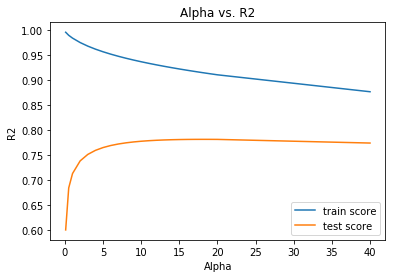

In [229]:
# plotting mean test and train score against each alpha value
cvresults['param_alpha'] = cvresults['param_alpha'].astype('float32')
plt.plot(cvresults.param_alpha,cvresults.mean_train_score)
plt.plot(cvresults.param_alpha,cvresults.mean_test_score)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title("Alpha vs. R2")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [230]:
# Using Ridge Regression with alpha = 10
al=10
ridge3=Ridge(alpha=al)
ridge3.fit(xtrain,ytrain)

# predict
y_train_pred = ridge3.predict(xtrain)
print("Train R2 =",metrics.r2_score(y_true=ytrain, y_pred=y_train_pred))
y_test_pred = ridge3.predict(xtest)
print("Test R2 =",metrics.r2_score(y_true=ytest, y_pred=y_test_pred))

Train R2 = 0.9313899260837591
Test R2 = 0.8740362348113144


In [231]:
# Using lasso regression
lasso=Lasso()
Folds=5
lparams = {'alpha': [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.1]}
modelcv=GridSearchCV(estimator=lasso,param_grid=lparams,cv=Folds,return_train_score=True,scoring='r2',verbose=1)
modelcv.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.2s finished
C:\Users\Anupama\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [232]:
# Creating dataframe with the cross validation results
cvresults=pd.DataFrame(modelcv.cv_results_)
cvresults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.057798,0.010459,0.005590,0.001957,0.001,{'alpha': 0.001},0.887396,0.717887,0.792623,0.830076,0.729345,0.791674,0.063283,2,0.926823,0.942400,0.936171,0.928509,0.940011,0.934783,0.006164
1,0.039952,0.006677,0.003190,0.002981,0.002,{'alpha': 0.002},0.880798,0.704308,0.789807,0.851856,0.730643,0.791676,0.067768,1,0.890034,0.909917,0.902544,0.893141,0.901123,0.899352,0.007076
2,0.031962,0.002526,0.003200,0.002995,0.003,{'alpha': 0.003},0.872139,0.695589,0.780796,0.843924,0.714497,0.781586,0.069311,3,0.865698,0.886970,0.878559,0.866117,0.876226,0.874714,0.008031
3,0.033552,0.001961,0.005596,0.001955,0.004,{'alpha': 0.004},0.854216,0.681265,0.768563,0.835582,0.698405,0.767794,0.069850,4,0.841535,0.864279,0.855004,0.844749,0.854677,0.852049,0.008112
4,0.032756,0.005871,0.003188,0.001594,0.005,{'alpha': 0.005},0.832649,0.684249,0.752973,0.829319,0.679578,0.755921,0.066729,5,0.821224,0.848449,0.834463,0.825817,0.834208,0.832832,0.009299


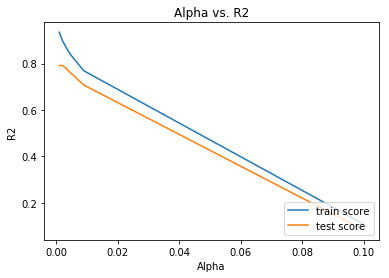

In [233]:
# Plotting alpha and R2
plt.plot(cvresults.param_alpha,cvresults.mean_train_score)
plt.plot(cvresults.param_alpha,cvresults.mean_test_score)
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title("Alpha vs. R2")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [234]:
# Looking at the graph above, choosing alpha as 0.001
al=0.001
lasso3=Lasso(alpha=al)
lasso3.fit(xtrain,ytrain)

# Finding the R2 score for test and train data
ytrain_pred=lasso3.predict(xtrain)
print('Train R2 =',metrics.r2_score(y_true=ytrain,y_pred=ytrain_pred))
ytest_pred=lasso3.predict(xtest)
print('Test R2 =',metrics.r2_score(y_true=ytest,y_pred=ytest_pred))

Train R2 = 0.9218851006356591
Test R2 = 0.9014311160412106


In [235]:
# Creating a dataframe with all coefficients of lasso regression
Lasso_Coef3=pd.DataFrame(lasso.coef_)
Lasso_Coef3.rename(columns={0:'Coefficients'},inplace=True)
Lasso_Coef3

,Coefficients
0,0.000000
1,0.031782
2,0.000000
3,0.000000
4,0.000000
5,-0.001573
6,0.057598
7,0.546564
8,0.334735
9,0.022663


In [236]:
# Shape of lasso_coef dataframe
Lasso_Coef3.shape

(684, 1)

In [237]:
# Creating a new dataframe with all lasso coefficients and all features
xtrainfeatures=pd.DataFrame(xtrain.columns)
coefficients3 = pd.concat([xtrainfeatures,Lasso_Coef3], axis = 1)
coefficients3.rename(columns={0:'Features'},inplace=True)
coefficients3.head()

,Features,Coefficients
0,LotFrontage,0.000000
1,LotArea,0.031782
2,Street,0.000000
3,RoofMatl,0.000000
4,MasVnrArea,0.000000


In [238]:
# Dropping all features which have coefficient = 0
coefficients3=coefficients3.transpose()
for col in coefficients3:
    if coefficients3[col][1]==0:
        coefficients3.drop(col,axis=1,inplace=True)

# Sorting the features in descending order
coefficients3=coefficients3.transpose()
coefficients3=coefficients3.sort_values(by='Coefficients',ascending=False)
coefficients3.head(10)

,Features,Coefficients
7,1stFlrSF,0.546564
8,2ndFlrSF,0.334735
66,Neighborhood_StoneBr,0.104332
360,KitchenQual_Ex,0.101909
65,Neighborhood_Somerst,0.0977894
379,Functional_Typ,0.0719703
259,YearRemodAdd_2009,0.0714332
306,BsmtQual_Ex,0.0657907
479,GarageCars_3,0.0630691
6,CentralAir,0.0575976
